
# Notebook 1: Exploratory Data Analysis and Dataset Overview

Welcome to Notebook 1 of our anime recommendation system project!

The primary objective of this notebook is to delve into the anime datasets, conducting an in-depth exploration and analysis. Our aim is to gain comprehensive insights into the dataset, including the distribution of anime titles, genres, user ratings, and other pertinent features. Through various visualizations such as plots and charts, we'll uncover underlying patterns and trends in the data.

By thoroughly exploring the dataset in this notebook, we'll pave the way for essential data preprocessing steps before transitioning to Notebook 2: Model Training.

[Access Notebook 2: Model Training here](https://www.kaggle.com/code/dbdmobile/anime-recommendation-2)

Running through this initial notebook is pivotal to grasp the dataset's nuances and prepare the groundwork for subsequent model training. Let's embark on our data exploration journey!

# Importing libraries

In [1]:
#!pip install plotly

In [2]:
#!pip install wordcloud

In [3]:
#!pip install langdetect

In [4]:
# Essential libraries for data handling and visualization
import numpy as np
import pandas as pd

# Visualization tools
import plotly.express as px  # For interactive visualizations
import plotly.graph_objects as go  # For 3D plot visualization
import plotly.figure_factory as ff  # For additional figure support
from plotly.offline import init_notebook_mode, iplot  # Initializing and displaying plotly figures
init_notebook_mode(connected=True)  # Connecting Plotly to the notebook

# Additional tools for specific visualization elements
from wordcloud import WordCloud  # Creating word clouds
from langdetect import detect  # Language detection
from datetime import datetime  # Date/time manipulation

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# # Loading our Dataset

In [5]:
# Adjusting column display settings to showcase up to 50 columns
pd.set_option('display.max_columns', 50)

In [6]:
# Loading the anime details dataset from the CSV file
df_anime = pd.read_csv('C:/Downloads/Chrome/DS/fp/dataset_2023/anime-dataset-2023.csv')

# Displaying the dataset's shape (rows, columns) and showcasing the initial 3 rows for a glimpse into the data
print("Shape of the Dataset:", df_anime.shape)
df_anime.head(3)

Shape of the Dataset: (24905, 24)


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...


In [7]:
# Loading the user details dataset from the provided file path
df_user = pd.read_csv('C:/Downloads/Chrome/DS/fp/dataset_2023/users-details-2023.csv')

# Checking and displaying the dataset's shape (rows, columns) along with the first few rows
print("Shape of the Dataset:", df_user.shape)
df_user.head()

Shape of the Dataset: (731290, 16)


,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0


In [8]:
# Loading the user score dataset from the provided file path
df_score = pd.read_csv('C:/Downloads/Chrome/DS/fp/dataset_2023/users-score-2023.csv')

# Checking and displaying the dataset's shape (rows, columns) along with the first few rows
print("Shape of the dataset:", df_score.shape)
df_score.head()

Shape of the dataset: (24325191, 5)


,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


# Explorartory Data Analysis

## Data Exploration

#### Checking Each Dataframes
In order to gain a better understanding of the data, it is important to examine each DataFrame individually. This includes assessing its structure and identifying any missing values. We will begin this process by using the info() method, which provides a comprehensive overview of the DataFrame's columns and structure.

In [9]:
# Displaying information about the anime details dataset
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [10]:
# Checking the value counts of the 'Score' column in the anime details dataset
df_anime['Score'].value_counts()

UNKNOWN    9213
6.31         80
6.54         80
6.25         79
6.51         79
           ... 
3.21          1
3.29          1
1.85          1
3.69          1
4.07          1
Name: Score, Length: 567, dtype: int64

In [11]:
# Extracting valid scores from the 'Score' column
scores = df_anime['Score'][df_anime['Score'] != 'UNKNOWN']

# Converting scores to a floating-point format
scores = scores.astype('float')

# Calculating the mean score
score_mean = round(scores.mean(), 2)

In [12]:
# Replace 'UNKNOWN' scores with the calculated mean score
df_anime['Score'] = df_anime['Score'].replace('UNKNOWN', score_mean)

# Convert the 'Score' column to float64
df_anime['Score'] = df_anime['Score'].astype('float64')

In [13]:
# Check the unique values in the 'Ranked' column
df_anime['Rank'].value_counts()

UNKNOWN    4612
0.0         187
6542.0        4
16675.0       4
6577.0        4
           ... 
18424.0       1
18423.0       1
11642.0       1
8977.0        1
14536.0       1
Name: Rank, Length: 15198, dtype: int64

In [14]:
# Replacing 'UNKNOWN' entries with NaN in the 'Rank' column
df_anime['Rank'] = df_anime['Rank'].replace('UNKNOWN', np.nan)

# Converting the 'Rank' column to float64 for numerical operations
df_anime['Rank'] = df_anime['Rank'].astype('float64')

In [15]:
# Displaying information about the 'User' DataFrame
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731290 entries, 0 to 731289
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Mal ID            731290 non-null  int64  
 1   Username          731290 non-null  object 
 2   Gender            224383 non-null  object 
 3   Birthday          168068 non-null  object 
 4   Location          152806 non-null  object 
 5   Joined            731290 non-null  object 
 6   Days Watched      731282 non-null  float64
 7   Mean Score        731282 non-null  float64
 8   Watching          731282 non-null  float64
 9   Completed         731282 non-null  float64
 10  On Hold           731282 non-null  float64
 11  Dropped           731282 non-null  float64
 12  Plan to Watch     731282 non-null  float64
 13  Total Entries     731282 non-null  float64
 14  Rewatched         731282 non-null  float64
 15  Episodes Watched  731282 non-null  float64
dtypes: float64(10), int6

In [16]:
# Check for missing values in the 'df_score' DataFrame
# Sum up the count of missing values column-wise
df_score.isnull().sum()

user_id        0
Username       0
anime_id       0
Anime Title    0
rating         0
dtype: int64

## Data Visualization

### Exploring Anime Dataset

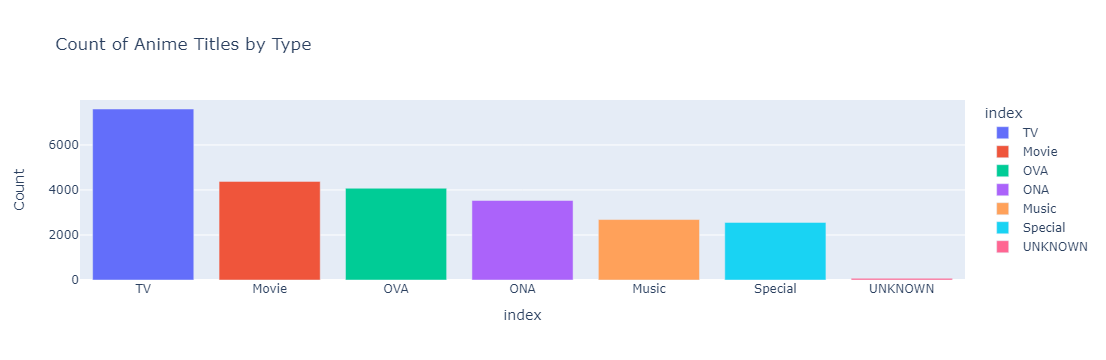

In [17]:
# Count the occurrences of each anime type and store the result in 'type_counts'
type_counts = df_anime['Type'].value_counts()

# Create a bar chart using Plotly Express (px)
# Set the x-axis as the different anime types, y-axis as their respective counts
# Color the bars based on the anime types
# Set labels for x and y axes, and provide a title for the chart
fig = px.bar(type_counts, x=type_counts.index, y=type_counts.values, color=type_counts.index,
             labels={'x':'Anime Type', 'y':'Count'}, title='Count of Anime Titles by Type')

# Display the bar chart
fig.show()

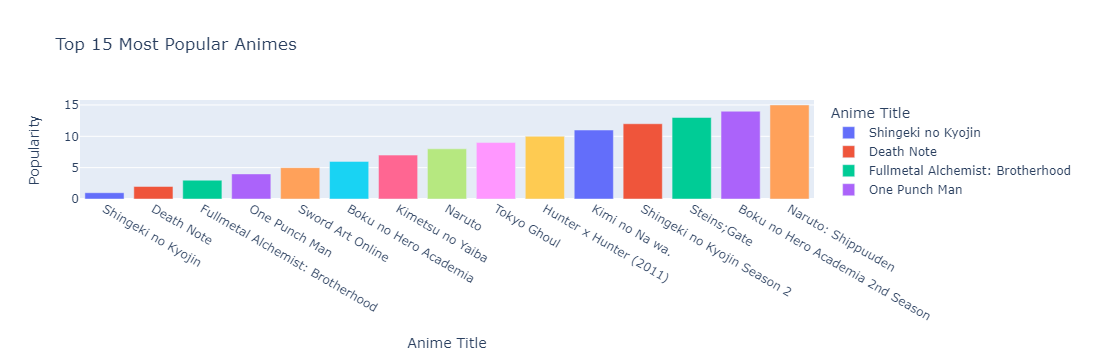

In [18]:
# Filter out anime titles with a popularity value greater than 0
# This will create a new DataFrame with anime having a positive popularity value
df_valid_popularity = df_anime[df_anime['Popularity'] > 0]

# Sort the DataFrame by 'Popularity' in ascending order and select the top 15 most popular animes
top_10_popular = df_valid_popularity.sort_values(by='Popularity', ascending=True).head(15)

# Create a bar chart using Plotly Express (px)
# Set 'Name' as the x-axis (anime titles), 'Popularity' as the y-axis (popularity values),
# Label the x and y axes accordingly, set the title for the chart, and color the bars based on anime titles
fig = px.bar(top_10_popular, x='Name', y='Popularity',
             labels={'Name': 'Anime Title', 'Popularity': 'Popularity'},
             title='Top 15 Most Popular Animes',
             color='Name')

# Display the bar chart
fig.show()

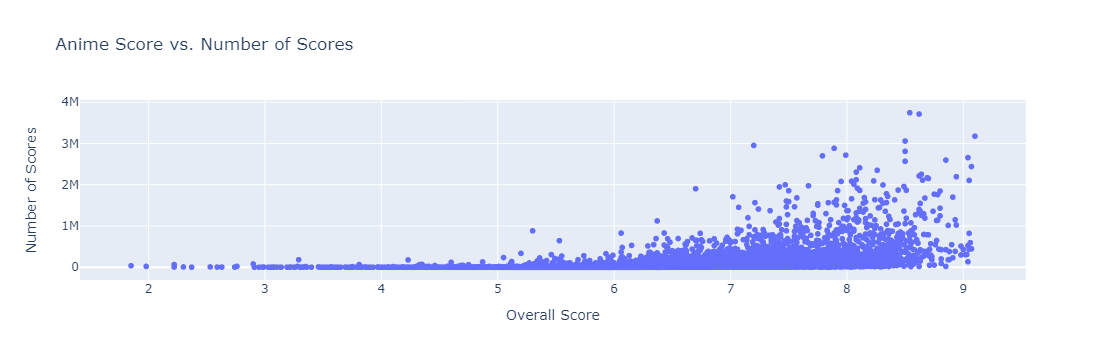

In [19]:
# Create a scatter plot using Plotly Express (px)
# The x-axis represents the 'Score' of the anime, and the y-axis represents the number of 'Members' who scored
# Label the x and y axes accordingly, set the title for the plot
fig = px.scatter(df_anime, x='Score', y='Members', 
                 labels={'Score':'Overall Score', 'Members':'Number of Scores'}, 
                 title='Anime Score vs. Number of Scores')

# Display the scatter plot
fig.show()

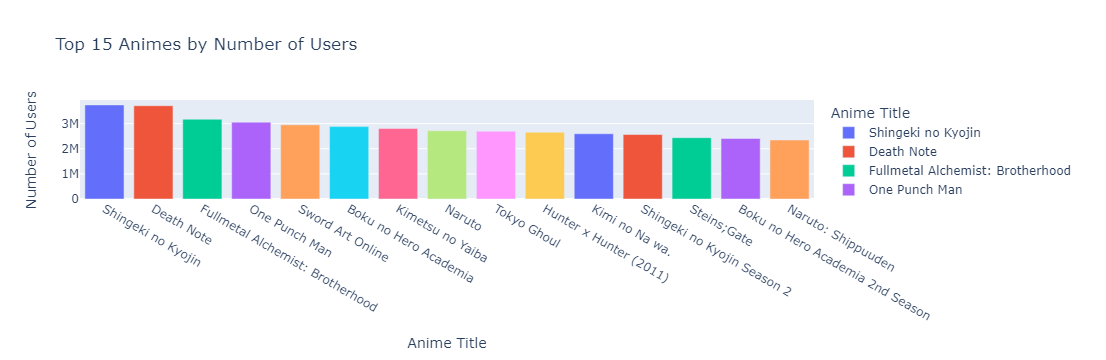

In [20]:
# Sort the anime dataframe by the number of users who have scored the anime in descending order and select the top 15
top_15_scored = df_anime.sort_values(by='Members', ascending=False).head(15)

# Create a bar chart using Plotly Express (px)
# The x-axis represents the 'Name' of the anime, and the y-axis represents the 'Members' or the number of users who scored the anime
# Label the x and y axes accordingly, set the title for the plot
fig = px.bar(top_15_scored, x='Name', y='Members', 
             labels={'Members':'Number of Users', 'Name':'Anime Title'}, color='Name',
             title='Top 15 Animes by Number of Users')

# Display the bar chart
fig.show()

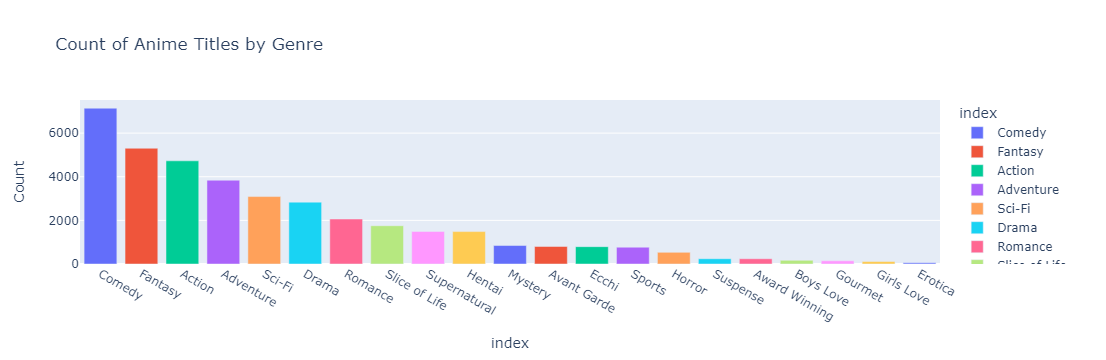

In [21]:
# Filter out rows where the 'Genres' column is not labeled as 'UNKNOWN', split the genres, and count their occurrences
genre_counts = df_anime[df_anime['Genres'] != "UNKNOWN"]['Genres'].apply(lambda x: x.split(', ')).explode().value_counts()

# Create a bar chart using Plotly Express (px)
# The x-axis represents the different genres, and the y-axis represents the count of each genre
# Label the x and y axes accordingly, set the title for the plot, and color the bars based on genre
fig = px.bar(genre_counts, x=genre_counts.index, y=genre_counts.values,
             labels={'x':'Genre', 'y':'Count'},
             title='Count of Anime Titles by Genre',
             color=genre_counts.index)

# Display the bar chart
fig.show()

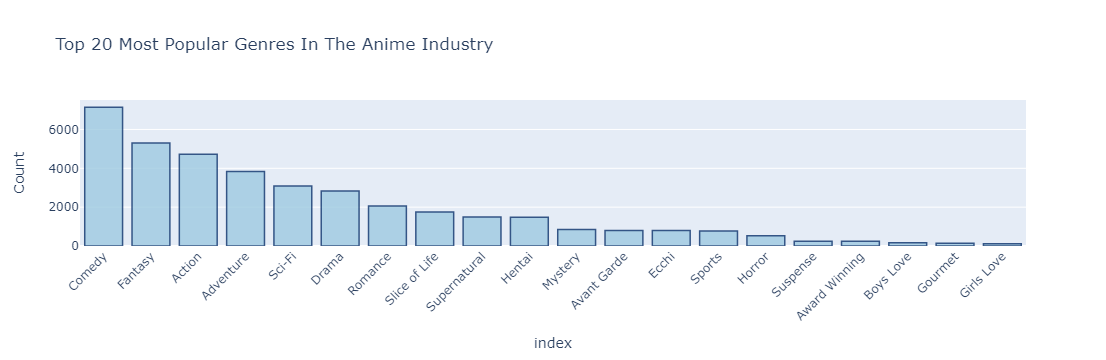

In [22]:
# Select the top 20 genres based on their occurrence count
top_20_genres = genre_counts.head(20)

# Create a bar chart using Plotly Express (px) for the top 20 genres
# The x-axis represents the genres, and the y-axis represents their respective count
# Customize the x and y-axis labels, set the title for the plot
fig = px.bar(top_20_genres, x=top_20_genres.index, y=top_20_genres.values,
             labels={'x':'Genre', 'y':'Count'},
             title='Top 20 Most Popular Genres In The Anime Industry')

# Customize the appearance of the bar chart
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',  # Setting bar colors
                  marker_line_width=1.5, opacity=0.8)  # Adjusting marker line width and opacity

# Rotate x-axis labels for better readability and adjust font sizes for axis titles
fig.update_layout(xaxis_tickangle=-45, xaxis=dict(tickfont=dict(size=12)),
                  yaxis=dict(titlefont=dict(size=14)))

# Display the customized bar chart
fig.show()

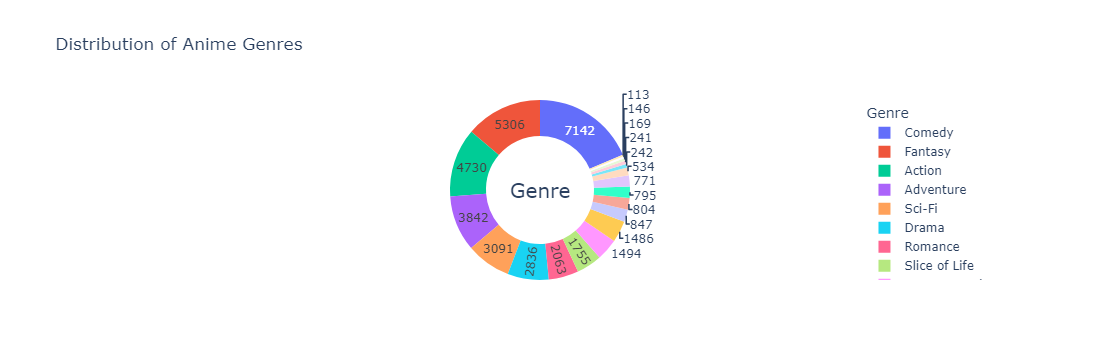

In [23]:
# Create a Plotly figure for a pie chart representation of genre distribution
fig = go.Figure(data=[go.Pie(
    labels=top_20_genres.index,  # Genre labels for the pie chart
    values=top_20_genres.values,  # Count of each genre in the dataset
    hole=0.6,  # Size of the central hole in the pie chart (for donut chart effect)
    hoverinfo='label+percent',  # Information displayed on hover (label and percentage)
    textinfo='value'  # Information displayed inside each pie slice (the count of each genre)
)])

# Update the layout and styling of the pie chart
fig.update_layout(
    title='Distribution of Anime Genres',  # Title for the pie chart
    legend=dict(font=dict(size=12), title='Genre'),  # Styling for the legend
    annotations=[dict(text='Genre', x=0.5, y=0.5, font_size=20, showarrow=False)]  # Annotations for the chart
)

# Display the pie chart figure
fig.show()